In [1]:
import cv2
import numpy as np
import insightface
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image
import pdb
import os

In [2]:
app = FaceAnalysis()
app.prepare(ctx_id=0, det_size=(640, 640))

Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}, 'CUDAExecutionProvider': {'cudnn_conv_algo_search': 'EXHAUSTIVE', 'do_copy_in_default_stream': '1', 'arena_extend_strategy': 'kNextPowerOfTwo', 'gpu_external_free': '0', 'gpu_external_alloc': '0', 'gpu_mem_limit': '18446744073709551615', 'device_id': '0'}}
find model: /home/geez0219/.insightface/models/antelopev2/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}, 'CUDAExecutionProvider': {'cudnn_conv_algo_search': 'EXHAUSTIVE', 'do_copy_in_default_stream': '1', 'arena_extend_strategy': 'kNextPowerOfTwo', 'gpu_external_free': '0', 'gpu_external_alloc': '0', 'gpu_mem_limit': '18446744073709551615', 'device_id': '0'}}
find model: /home/geez0219/.insightface/models/antelopev2/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CUDAEx

In [3]:
def get_single_face(img, app):
    faces = app.get(img)
    if len(faces) > 1:
        bbox_area = []
        for face in faces:
            bbox = face["bbox"]
            bbox_area.append((bbox[2] - bbox[0]) * (bbox[3] - bbox[1]))
        face = faces[np.argmax(bbox_area)]
    else:
        face = faces[0]
    return face

In [4]:
def similarity(vec1, vec2):
    return np.dot(vec1, vec2)

In [20]:
target_path = "./img/targets"
avg_embedding = {}

for name in os.listdir(target_path):
    tmp = []
    for file in os.scandir(os.path.join(target_path, name)):
        if file.is_file():
            img = cv2.imread(file.path)
            face = get_single_face(img, app)
            tmp.append(face.normed_embedding)
    tmp = np.mean(tmp, axis=0)
    avg_embedding[name] = tmp / np.linalg.norm(tmp)

In [6]:
def classify(img, app, avg_embedding, threshold=0.5):
    vec1 = get_single_face(img, app).normed_embedding
    for name, vec2 in avg_embedding.items():
        if similarity(vec1, vec2) > threshold:
            return name
    
    return "other"

In [7]:
for file in os.scandir(os.path.join(target_path, "sam")):
    img = cv2.imread(file.path)
    vec1 = get_single_face(img, app).normed_embedding
    for name, vec2 in avg_embedding.items():
        print(f"img:{file.path} sim with {name} is {np.dot(vec1, vec2)}")

img:./img/targets/sam/IMG_1098.jpeg sim with lebron is -0.040084246546030045
img:./img/targets/sam/IMG_1098.jpeg sim with strong is -0.008054647594690323
img:./img/targets/sam/IMG_1098.jpeg sim with jacky is 0.04018164053559303
img:./img/targets/sam/IMG_1098.jpeg sim with guo is 0.08803486824035645
img:./img/targets/sam/IMG_1098.jpeg sim with yang is 0.07400315999984741
img:./img/targets/sam/IMG_1098.jpeg sim with ko is 0.19281646609306335
img:./img/targets/sam/IMG_1098.jpeg sim with chung is -0.014713436365127563
img:./img/targets/sam/IMG_1098.jpeg sim with mickey is 0.20100605487823486
img:./img/targets/sam/IMG_1098.jpeg sim with sam is 0.9249907732009888
img:./img/targets/sam/IMG_1098.jpeg sim with president is 0.02157488465309143
img:./img/targets/sam/IMG_1051.JPG sim with lebron is -0.0839085727930069
img:./img/targets/sam/IMG_1051.JPG sim with strong is -0.0847039669752121
img:./img/targets/sam/IMG_1051.JPG sim with jacky is 0.04052487760782242
img:./img/targets/sam/IMG_1051.JPG 

In [8]:
for file in os.scandir(os.path.join(target_path, "mickey")):
    img = cv2.imread(file.path)
    vec1 = get_single_face(img, app).normed_embedding
    for name, vec2 in avg_embedding.items():
        print(f"img:{file.path} sim with {name} is {np.dot(vec1, vec2)}")

img:./img/targets/mickey/IMG_1400.jpeg sim with lebron is -0.09027901291847229
img:./img/targets/mickey/IMG_1400.jpeg sim with strong is -0.025192642584443092
img:./img/targets/mickey/IMG_1400.jpeg sim with jacky is 0.0827181339263916
img:./img/targets/mickey/IMG_1400.jpeg sim with guo is -0.03513738512992859
img:./img/targets/mickey/IMG_1400.jpeg sim with yang is 0.1499098688364029
img:./img/targets/mickey/IMG_1400.jpeg sim with ko is 0.12093760073184967
img:./img/targets/mickey/IMG_1400.jpeg sim with chung is 0.06589789688587189
img:./img/targets/mickey/IMG_1400.jpeg sim with mickey is 0.7561917304992676
img:./img/targets/mickey/IMG_1400.jpeg sim with sam is 0.14414271712303162
img:./img/targets/mickey/IMG_1400.jpeg sim with president is -0.03240840137004852
img:./img/targets/mickey/IMG_1183.jpeg sim with lebron is -0.006272859871387482
img:./img/targets/mickey/IMG_1183.jpeg sim with strong is -0.055690422654151917
img:./img/targets/mickey/IMG_1183.jpeg sim with jacky is 0.0223712529

In [9]:
for file in os.scandir("./img/other"):
    img = cv2.imread(file.path)
    vec1 = get_single_face(img, app).normed_embedding
    for name, vec2 in avg_embedding.items():
        print(f"img:{file.path} sim with {name} is {np.dot(vec1, vec2)}")

img:./img/other/0.jpg sim with lebron is -0.12103515863418579
img:./img/other/0.jpg sim with strong is -0.009011485613882542
img:./img/other/0.jpg sim with jacky is 0.16956645250320435
img:./img/other/0.jpg sim with guo is 0.1922370344400406
img:./img/other/0.jpg sim with yang is 0.074955515563488
img:./img/other/0.jpg sim with ko is -0.0544852539896965
img:./img/other/0.jpg sim with chung is 0.03694089874625206
img:./img/other/0.jpg sim with mickey is -0.020206531509757042
img:./img/other/0.jpg sim with sam is -0.03140083700418472
img:./img/other/0.jpg sim with president is -0.0024091508239507675
img:./img/other/2.jpg sim with lebron is 0.028178595006465912
img:./img/other/2.jpg sim with strong is 0.7691057920455933
img:./img/other/2.jpg sim with jacky is -0.018894560635089874
img:./img/other/2.jpg sim with guo is 0.05186579003930092
img:./img/other/2.jpg sim with yang is 0.004877831786870956
img:./img/other/2.jpg sim with ko is -0.04003266245126724
img:./img/other/2.jpg sim with chun

## Test

In [10]:
all_imgs = []
for path, dirs, files in os.walk("./img"):
    for f in files:
        all_imgs.append(os.path.join(path, f))

In [11]:
for img_path in np.random.choice(all_imgs, 10):
    img = cv2.imread(img_path)
    print(f"img:{img_path} is classified as {classify(img, app, avg_embedding)}")

img:./img/test/guo/founder-m.png is classified as guo
img:./img/targets/strong/132542455.jpg is classified as strong
img:./img/other/0.jpg is classified as other
img:./img/test/other1/1038x768_269745289201.jpg is classified as other
img:./img/test/other5/123211.jpg is classified as other
img:./img/targets/chung/article-5d6e2fd86e0a2.jpg is classified as chung
img:./img/test/chung/php2nLagb.jpg is classified as chung
img:./img/targets/mickey/IMG_1183.jpeg is classified as mickey
img:./img/targets/ko/20201113005225.jpg is classified as ko
img:./img/targets/chung/article-5d6e2fd86e0a2.jpg is classified as chung


In [15]:
test_path = "./img/test"
test_embedding = {}

for name in os.listdir(test_path):
    tmp = []
    for file in os.scandir(os.path.join(test_path, name)):
        if file.is_file():
            img = cv2.imread(file.path)
            face = get_single_face(img, app)
            tmp.append(face.normed_embedding)
    test_embedding[name] = tmp

In [28]:
def classify_from_vec(embedding, avg_embedding, threshold=0.5):
    for name, vec in avg_embedding.items():
        if similarity(embedding, vec) > threshold:
            return name
        
    return "other"

In [30]:
def get_group_state(threshold, test_embedding, avg_embedding):
    TP, FP, FN, TN = 0, 0, 0, 0
    for label, vecs in test_embedding.items():
        for vec in vecs:
            predicted = classify_from_vec(vec, avg_embedding, threshold)
            if not label.startswith("other") and predicted != "other":
                TP += 1
            elif label.startswith("other") and predicted != "other":
                FP += 1
            elif not label.startswith("other") and predicted == "other":
                FN += 1
            else:
                TN += 1
    return TP, FP, FN, TN

In [47]:
def plot_ROC_curve(test_embedding, avg_embedding, points=100):
    import matplotlib.pyplot as plt
    thresholds = np.linspace(0, 1, points)
    
    precisions = []
    recalls = []
    t_pre = []
    t_rec = []
    for t in thresholds:
        TP, FP, FN, TN = get_group_state(t, test_embedding, avg_embedding)
        if (TP + FP) != 0:
            precisions.append(TP / (TP + FP))
            t_pre.append(t)
        if (TP + FN) != 0:
            recalls.append(TP / (TP + FN))
            t_rec.append(t)
        
    fig, ax = plt.subplots()

    # Using set_dashes() to modify dashing of an existing line
    line1, = ax.plot(t_pre, precisions, label='precision')
    line1.set_dashes([2, 2, 10, 2])  # 2pt line, 2pt break, 10pt line, 2pt break

    # Using plot(..., dashes=...) to set the dashing when creating a line
    line2, = ax.plot(t_rec, recalls, label='recall')

    ax.legend()
    plt.show()

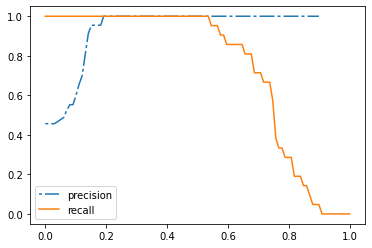

In [48]:
plot_ROC_curve(test_embedding, avg_embedding, points=100)